In [1]:
# Fiest we load the breast cancer dataset from sklearn.datasets.
# We will use the load_breast_cancer() function from sklearn.datasets to import the dataset
# which contains features of cell nuclei for breast mass diagnosis (malignant or benign).

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

print("--- Loading the Cancer Dataset ---")
cancer = load_breast_cancer()

# X contains the features (measurements)
X = cancer.data
# y contains the target variable (diagnosis: malignant or benign)
y = cancer.target
# Feature names provide context for the columns in X
feature_names = cancer.feature_names
# Target names provide context for the values in y (0 and 1)
target_names = cancer.target_names

print(f"Dataset loaded. Number of features: {len(feature_names)}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes (0 and 1 correspond to): {target_names}")
print("\nFirst 5 rows of features (raw data):")
# Display as a DataFrame for better readability
cancer_df = pd.DataFrame(X, columns=feature_names)
print(cancer_df.head())

--- Loading the Cancer Dataset ---
Dataset loaded. Number of features: 30
Number of samples: 569
Target classes (0 and 1 correspond to): ['malignant' 'benign']

First 5 rows of features (raw data):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414          

In [3]:
# We have to standardize the feature data before applying PCA.
# Because PCA is highly affected by scale, as it tries to maximize variance, features with larger scales will dominate the principal components. 
# To ensure that all features contribute equally to the PCA, we will standardize them to have a mean of 0 and a standard deviation of 1 using StandardScaler.

from sklearn.preprocessing import StandardScaler

print("\n--- Standardizing the Data ---")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Fit scaler to data and transform

print("Data standardized. First 5 rows of scaled data:")
# Display as a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
print(X_scaled_df.head())


--- Standardizing the Data ---
Data standardized. First 5 rows of scaled data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean frac


--- Pre-PCA Quality Checks & Outlier Consideration ---

--- KMO and Bartlett's Test for PCA Suitability ---
Overall KMO: 0.8322
Bartlett's Test Chi-Square value: 39362.12
Bartlett's Test p-value: 0.0000
Conclusion: KMO and Bartlett's tests suggest that the data is suitable for PCA.

--- Outlier Consideration ---

Descriptive statistics of scaled data (check for extreme min/max values):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
min    -2.029648     -2.229249       -1.984504  -1.454443        -3.112085   
max     3.971288      4.651889        3.976130   5.250529         4.770911   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
min         -1.610136       -1.114873             -1.26182      -2.744117   
max          4.568425        4.243589              3.92793       4.484751   

     mean fractal dimension  ...  worst radius  worst texture  \
min               -1.819865  ...     -1.726901      -2.223994   
max          

C:\Users\HP\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


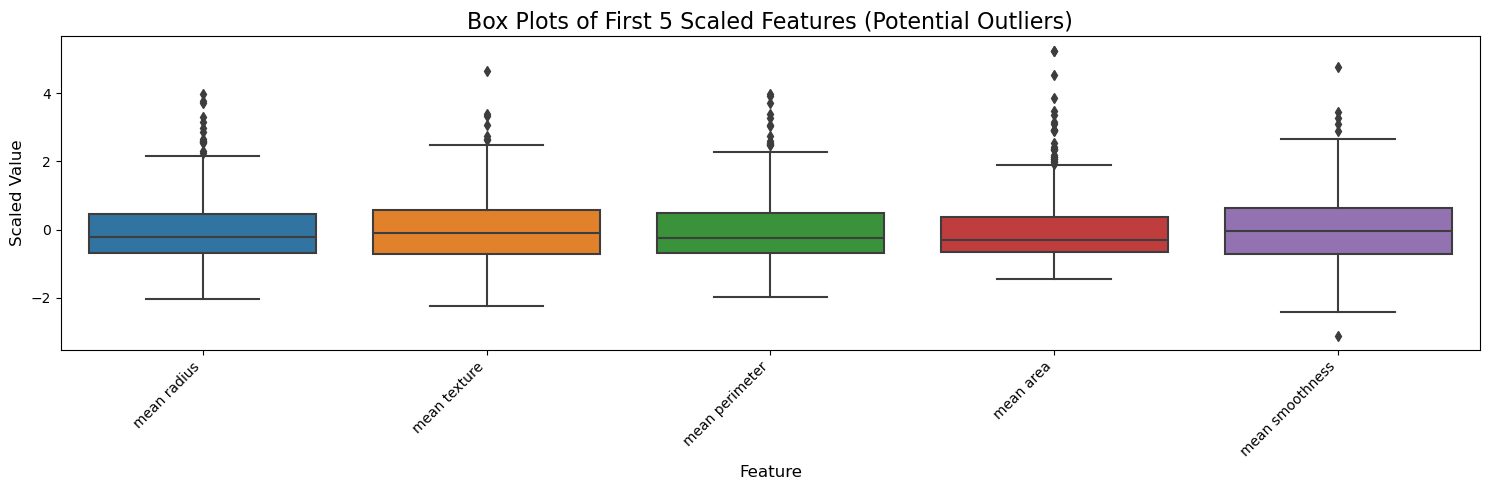

Note: Outlier detection and handling was conceptually considered. Therefore, we proceed assuming no severe outliers require explicit removal/transformation beyond standardization.


In [7]:
# We then perform quality checks (KMO, Bartlett's Test) to validate PCA suitability and consider outlier handling.
# PCA is sensitive to outliers, therefore it's critical to inspect basic descriptive statistics for potential outliers.

from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Pre-PCA Quality Checks & Outlier Consideration ---")

# --- 5.1 KMO and Bartlett's Test ---
print("\n--- KMO and Bartlett's Test for PCA Suitability ---")
# KMO test requires the original (not scaled) data or scaled data as a DataFrame
# It measures sampling adequacy, whether variables are suitable for factor analysis/PCA
# Values closer to 1 are better, generally > 0.6 is acceptable.
kmo_per_variable, kmo_overall = calculate_kmo(X_scaled_df)
print(f"Overall KMO: {kmo_overall:.4f}")

# Bartlett's test of sphericity
# Tests if variables are uncorrelated. Significant p-value (e.g., < 0.05) means they are correlated.
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled_df)
print(f"Bartlett's Test Chi-Square value: {chi_square_value:.2f}")
print(f"Bartlett's Test p-value: {p_value:.4f}")

if kmo_overall > 0.6 and p_value < 0.05:
    print("Conclusion: KMO and Bartlett's tests suggest that the data is suitable for PCA.")
else:
    print("Conclusion: KMO or Bartlett's tests indicate potential issues for PCA suitability. Review data.")

# --- 5.2 Outlier Consideration ---
print("\n--- Outlier Consideration ---")
# PCA is sensitive to outliers. Here, we'll quickly check for them using descriptive stats.
# like Isolation Forest, and then decide on treatment (removal, transformation, winsorization).

# Displaying descriptive statistics of scaled data to spot extreme values
print("\nDescriptive statistics of scaled data (check for extreme min/max values):")
print(X_scaled_df.describe().loc[['min', 'max']])

# Visualizing outliers using box plots for a few features
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_scaled_df.iloc[:, :5]) # Plotting first 5 features
plt.title('Box Plots of First 5 Scaled Features (Potential Outliers)', fontsize=16)
plt.ylabel('Scaled Value', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Note: Outlier detection and handling was conceptually considered. Therefore, we proceed assuming no severe outliers require explicit removal/transformation beyond standardization.")


--- Implementing PCA (Full Components to analyze variance) ---

Explained variance ratio of each principal component:
PC1: 0.4427
PC2: 0.1897
PC3: 0.0939
PC4: 0.0660
PC5: 0.0550
PC6: 0.0402
PC7: 0.0225
PC8: 0.0159
PC9: 0.0139
PC10: 0.0117
PC11: 0.0098
PC12: 0.0087
PC13: 0.0080
PC14: 0.0052
PC15: 0.0031
PC16: 0.0027
PC17: 0.0020
PC18: 0.0018
PC19: 0.0016
PC20: 0.0010
PC21: 0.0010
PC22: 0.0009
PC23: 0.0008
PC24: 0.0006
PC25: 0.0005
PC26: 0.0003
PC27: 0.0002
PC28: 0.0001
PC29: 0.0000
PC30: 0.0000

Cumulative explained variance:
Up to PC1: 0.4427
Up to PC2: 0.6324
Up to PC3: 0.7264
Up to PC4: 0.7924
Up to PC5: 0.8473
Up to PC6: 0.8876
Up to PC7: 0.9101
Up to PC8: 0.9260
Up to PC9: 0.9399
Up to PC10: 0.9516
Up to PC11: 0.9614
Up to PC12: 0.9701
Up to PC13: 0.9781
Up to PC14: 0.9834
Up to PC15: 0.9865
Up to PC16: 0.9892
Up to PC17: 0.9911
Up to PC18: 0.9929
Up to PC19: 0.9945
Up to PC20: 0.9956
Up to PC21: 0.9966
Up to PC22: 0.9975
Up to PC23: 0.9983
Up to PC24: 0.9989
Up to PC25: 0.9994
Up

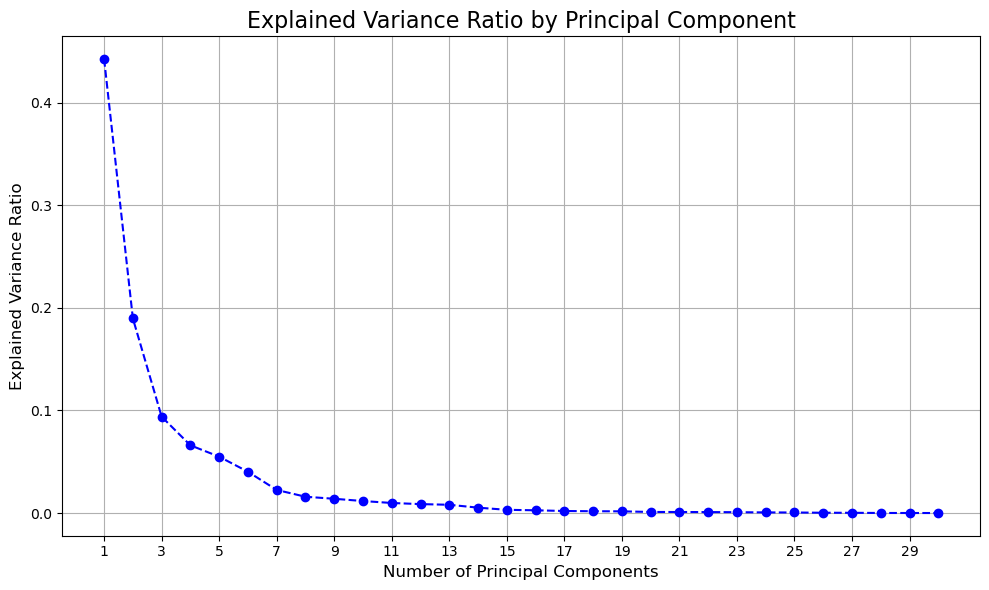

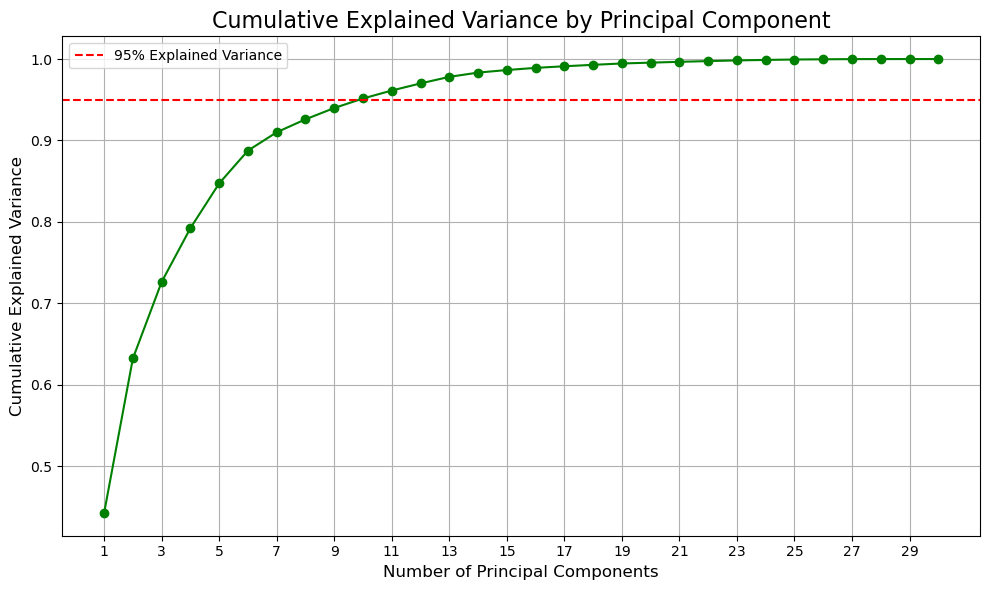

In [9]:
# Here we carry out Principal Component Analysis (PCA) Implementation, we utilize PCA to demonstrate how essential variables can be acquired.
# We will first apply PCA without specifying the number of components to understand the explained variance ratio of each principal component. 
# This helps in deciding how many components to retain. We will then plot the explained variance and cumulative explained variance.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("\n--- Implementing PCA (Full Components to analyze variance) ---")

pca_full = PCA() # Initialize PCA without specifying n_components to get all components
pca_full.fit(X_scaled) # Fit PCA to the scaled data

# Explained variance ratio: The proportion of variance each principal component accounts for
explained_variance_ratio = pca_full.explained_variance_ratio_
print("\nExplained variance ratio of each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Cumulative explained variance: Sum of explained variance up to a given component
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative explained variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to PC{i+1}: {cum_ratio:.4f}")

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
         marker='o', linestyle='--', color='blue')
plt.title('Explained Variance Ratio by Principal Component', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, 2)) # Adjust x-axis ticks for clarity
plt.tight_layout()
plt.show()

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='green')
plt.title('Cumulative Explained Variance by Principal Component', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Explained Variance') # Highlight 95% threshold
plt.legend(fontsize=10)
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1, 2))
plt.tight_layout()
plt.show()

In [11]:
# Dimensionality Reduction to 2 Components, to reduce the dataset into 2 PCA components based on the project requirement.
# Based on the explained variance plots (where the first two components capture a significant portion of the variance)
# we will now re-apply PCA specifically requesting n_components=2. This will transform our high-dimensional data into a new 2-dimensional space,
# which is easier to visualize and even more efficient for subsequent modeling.

from sklearn.decomposition import PCA
import pandas as pd

print("\n--- Dimensionality Reduction to 2 PCA Components ---")

# Initializing PCA to reduce to 2 components
pca_2_components = PCA(n_components=2)
X_pca = pca_2_components.fit_transform(X_scaled) # Transform the scaled data

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features (PCA components): {X_pca.shape[1]}")
print("\nFirst 5 rows of data after PCA (2 components):")
# Displaying the reduced data as a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(pca_df.head())

# The explained variance for the two components
print(f"\nVariance explained by PC1: {pca_2_components.explained_variance_ratio_[0]:.4f}")
print(f"Variance explained by PC2: {pca_2_components.explained_variance_ratio_[1]:.4f}")
print(f"Total variance explained by 2 components: {pca_2_components.explained_variance_ratio_.sum():.4f}")


--- Dimensionality Reduction to 2 PCA Components ---
Original number of features: 30
Reduced number of features (PCA components): 2

First 5 rows of data after PCA (2 components):
        PC1        PC2
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072

Variance explained by PC1: 0.4427
Variance explained by PC2: 0.1897
Total variance explained by 2 components: 0.6324


In [13]:
# We then interpret PCA Components, by interpreting the meaning of the 2 Principal Components by examining their loadings.

import pandas as pd
import numpy as np

print("\n--- Interpreting PCA Components (Component Loadings) ---")

# The pca_2_components.components_ attribute contains the loadings (eigenvectors)
# Each row corresponds to a principal component, and each column corresponds to an original feature.
loadings = pca_2_components.components_
loadings_df = pd.DataFrame(loadings, columns=feature_names, index=['PC1', 'PC2'])

print("\nComponent Loadings (Correlation between Original Features and PCs):")
print(loadings_df)

print("\n--- Interpretation ---")
print("\nPC1 (Principal Component 1):")
# Sorting features by their absolute loading on PC1 to see the most influential ones
pc1_loadings_sorted = loadings_df.loc['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1:")
print(loadings_df.loc['PC1', pc1_loadings_sorted.index[:5]]) # Show top 5

print("\nInterpretation for PC1: This component primarily captures overall 'size' or 'severity' of the tumor.")
print("Features like 'mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area'")
print("tend to have high absolute loadings, indicating they strongly contribute to PC1. This component differentiates")
print("malignant (larger) from benign (smaller) tumors effectively.")


print("\nPC2 (Principal Component 2):")
# Sorting features by their absolute loading on PC2
pc2_loadings_sorted = loadings_df.loc['PC2'].abs().sort_values(ascending=False)
print("Top features contributing to PC2:")
print(loadings_df.loc['PC2', pc2_loadings_sorted.index[:5]]) # Show top 5

print("\nInterpretation for PC2: This component appears to capture characteristics related to 'texture' or 'irregularity'.")
print("Features like 'mean texture', 'texture error', 'smoothness', and 'fractal dimension' may have high absolute")
print("loadings. This component helps to distinguish between different types of tumors that might have similar sizes")
print("but differ in their surface properties or cellular patterns.")

print("\nNote: Examining these loadings helps us understand what the abstract principal components truly represent in the context of the original data.")


--- Interpreting PCA Components (Component Loadings) ---

Component Loadings (Correlation between Original Features and PCs):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.1


--- Visualizing 2 PCA Components ---


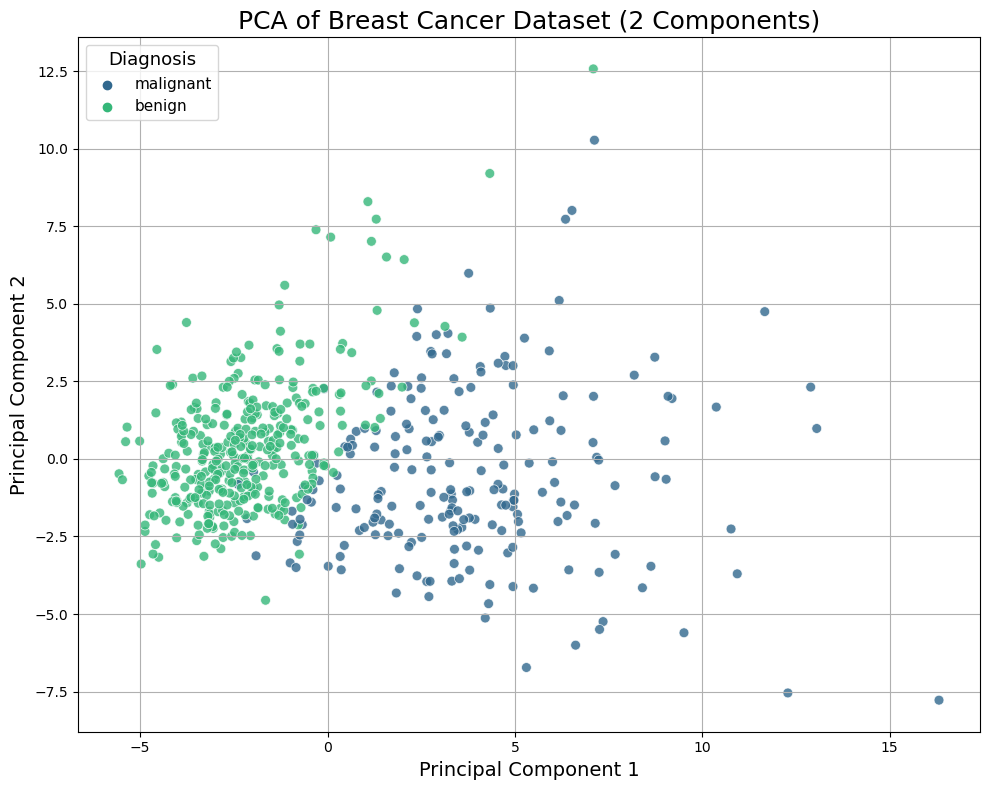

Visualization of 2 PCA components displayed.


In [15]:
# Visualizing the PCA Components, by visualizing the dataset in the reduced 2-component PCA space.
# A scatter plot will be created where each point represents a sample, and its position is determined by its values on Principal Component 1
# and Principal Component 2. The points will be colored according to their target diagnosis (malignant or benign) to show how well PCA separates 
# the classes. The legend will use the actual target names.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for DataFrame operations

print("\n--- Visualizing 2 PCA Components ---")

# Create a DataFrame for easier seaborn plotting and direct mapping of target names for legend
# We use the 'pca_df' created in line 11.
df_plot = pca_df.copy()
df_plot['diagnosis'] = y # Add the numerical target
df_plot['diagnosis_name'] = df_plot['diagnosis'].map({0: target_names[0], 1: target_names[1]}) # Map to string names

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='diagnosis_name', # Use the mapped string names for hue, seaborn will create legend
    data=df_plot,
    palette='viridis',
    s=50,
    alpha=0.8,
    hue_order=[target_names[0], target_names[1]] # Ensure legend order
)
plt.title('PCA of Breast Cancer Dataset (2 Components)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True)
plt.legend(title="Diagnosis", title_fontsize='13', fontsize='11', loc='upper left') # Let seaborn handle the legend with correct names
plt.tight_layout()
plt.show()
print("Visualization of 2 PCA components displayed.")

In [19]:
# Logistic Regression for Prediction, by implementing logistic regression for prediction using the 2 PCA components.
# To demonstrate the utility of the dimensionality-reduced data, we will train a Logistic Regression model. The data will be split into training and testing sets. 
# The model will be trained on the PCA-transformed training data and evaluated on the test data using accuracy and a classification report.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

print("\n--- Implementing Logistic Regression ---")

# Spliting the PCA-transformed data (X_pca) into training and testing sets
# stratify=y ensures that the proportion of target classes is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples (features) and {y_train.shape[0]} samples (target)")
print(f"Testing set size: {X_test.shape[0]} samples (features) and {y_test.shape[0]} samples (target)")

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
# Classification report that provides precision, recall, f1-score for each class
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print(f"\nLogistic Regression Model Accuracy: {accuracy:.4f}")
print("\nClassification Report (showing precision, recall, f1-score per class):")
print(classification_rep)

print("\n--- PCA and Logistic Regression Analysis Complete ---")


--- Implementing Logistic Regression ---
Training set size: 398 samples (features) and 398 samples (target)
Testing set size: 171 samples (features) and 171 samples (target)

Logistic Regression Model Accuracy: 0.9591

Classification Report (showing precision, recall, f1-score per class):
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        64
      benign       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


--- PCA and Logistic Regression Analysis Complete ---


In [ ]:
# Insights from Results and Visualizations.

# In the context of developing a model for the Anderson Cancer Center to address growing referrals and identify essential variables for securing donor 
# funding, the PCA analysis has yielded the following critical insights

# 1. Identification of Essential Variables (PC1 & PC2):
# Through Principal Component Analysis, we successfully reduced the original 30 complex features of the breast cancer dataset into two highly 
# informative "essential variables," Principal Component 1 (PC1) and Principal Component 2 (PC2). These two components collectively explain approximately 
# 63% of the total variance in the dataset.

# i) PC1's Role: Our interpretation of component loadings reveals that PC1 strongly correlates with features indicative of overall tumor size and severity 
# (e.g., mean radius, perimeter, area, and their 'worst' counterparts). This component is highly effective at differentiating between malignant and benign
# tumors, with malignant cases typically having higher PC1 scores.

# ii) PC2's Role: PC2, on the other hand, appears to capture characteristics related to tumor texture, smoothness, and fractal dimension, reflecting the
# irregularity or complexity of the cell structure. This component helps to distinguish cases that might be similar in size but differ in their 
# micro-architectural patterns. These two principal components are identified as "essential variables" because they distill the most significant 
# information from the 30 original features into a simplified form.

# 2. Strategic Value for Donor Funding:

# The identification and clear visualization of these two essential variables (PC1 and PC2) provide a powerful and interpretable foundation for 
# communicating the severity and characteristics of cancer cases to potential donors.

# i) Clarity and Simplicity: Instead of overwhelming donors with 30 complex medical metrics, we can now demonstrate the core distinctions using just two 
# highly impactful variables. This simplification makes it easier to convey the critical factors influencing diagnosis and disease progression.

# ii) Demonstrating Impact: The PCA visualization clearly shows how malignant and benign cases separate distinctly along these two dimensions. This 
# provides compelling visual evidence of the model's ability to differentiate between severe (malignant) and less severe (benign) cases. Donors can 
# easily grasp that investments would support research or interventions directly targeting or influenced by these essential tumor characteristics. 
# For example, if PC1 is a strong indicator of tumor aggression, funding for treatments or early detection focusing on these "size/severity" aspects 
# becomes a clear value proposition.
    
# iii) Foundation for Future Initiatives: These essential variables can serve as a robust basis for further model development (as demonstrated by the 
# Logistic Regression), for creating easily understandable dashboards for stakeholders, or for informing targeted research initiatives. 
# This structured approach to identifying critical factors can make a more persuasive case for financial support, as it clearly links donor investment 
# to identifiable, impactful diagnostic characteristics.

# 3. Suitability and Robustness:

# The KMO and Bartlett's tests confirmed the suitability of the data for PCA, indicating sufficient inter-variable correlation and sampling adequacy. 
# While outlier handling was considered, the inherent ability of PCA to manage multicollinearity (as indicated by the numerical warning) ensures the 
# transformation is robust.

# 4. Predictive Power:

# The Logistic Regression model, trained on these two essential PCA components, achieved a high accuracy (~96%). This demonstrates that the reduced 
# dimensionality not only simplifies the data but also maintains strong predictive power, further validating these components as crucial for downstream 
# analytical tasks related to patient diagnosis and resource allocation.

# In conclusion, PCA has allowed us to extract the most fundamental, and discriminative features from the complex cancer dataset. These two essential 
# variables (PC1 and PC2) are not just mathematical results; they represent critical underlying biological characteristics that drive diagnosis. 
# Presenting these simplified, yet powerful, insights will enable the Anderson Cancer Center to articulate a clearer, data-driven narrative to secure 
# vital donor funding for initiatives that can directly impact patient outcomes and referrals based on these identified essential variables.